In [29]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 40, end.month, end.day)

In [30]:
google_stock = yf.download("Gold", start, end)

google_stock.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOLD,GOLD,GOLD,GOLD,GOLD,GOLD
Date,,,,,,
1985-02-13 00:00:00+00:00,0.405,0.625,0.703125,0.625,0.0,19680
1985-02-14 00:00:00+00:00,0.405,0.625,0.703125,0.625,0.0,65920
1985-02-15 00:00:00+00:00,0.405,0.625,0.703125,0.625,0.0,31360
1985-02-19 00:00:00+00:00,0.405,0.625,0.625000,0.625,0.0,9120
1985-02-20 00:00:00+00:00,0.405,0.625,0.625000,0.625,0.0,40000


In [31]:
google_stock.shape

(10025, 6)

In [32]:
google_stock.isnull().sum()

,,0
Price,Ticker,
Adj Close,GOLD,0
Close,GOLD,0
High,GOLD,0
Low,GOLD,0
Open,GOLD,0
Volume,GOLD,0


In [33]:
google_stock.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOLD,GOLD,GOLD,GOLD,GOLD,GOLD
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,1.002500e+04
mean,15.509608,20.170118,20.474358,19.876301,20.172399,7.306354e+06
std,8.885161,11.282934,11.459594,11.120194,11.333440,8.269049e+06
min,0.354375,0.546875,0.546875,0.546875,0.000000,0.000000e+00
25%,10.564618,13.562500,13.750000,13.375000,13.580000,9.968000e+05
50%,14.788932,18.379999,18.660000,18.100000,18.375000,3.321700e+06
75%,19.049999,25.750000,26.070000,25.375000,25.750000,1.199950e+07
max,43.730812,55.630001,55.950001,55.090000,55.540001,7.445820e+07


In [34]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10025 entries, 1985-02-13 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOLD)  10025 non-null  float64
 1   (Close, GOLD)      10025 non-null  float64
 2   (High, GOLD)       10025 non-null  float64
 3   (Low, GOLD)        10025 non-null  float64
 4   (Open, GOLD)       10025 non-null  float64
 5   (Volume, GOLD)     10025 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 548.2 KB


Text(0.5, 1.0, 'Opening and Closing price of Google stock')

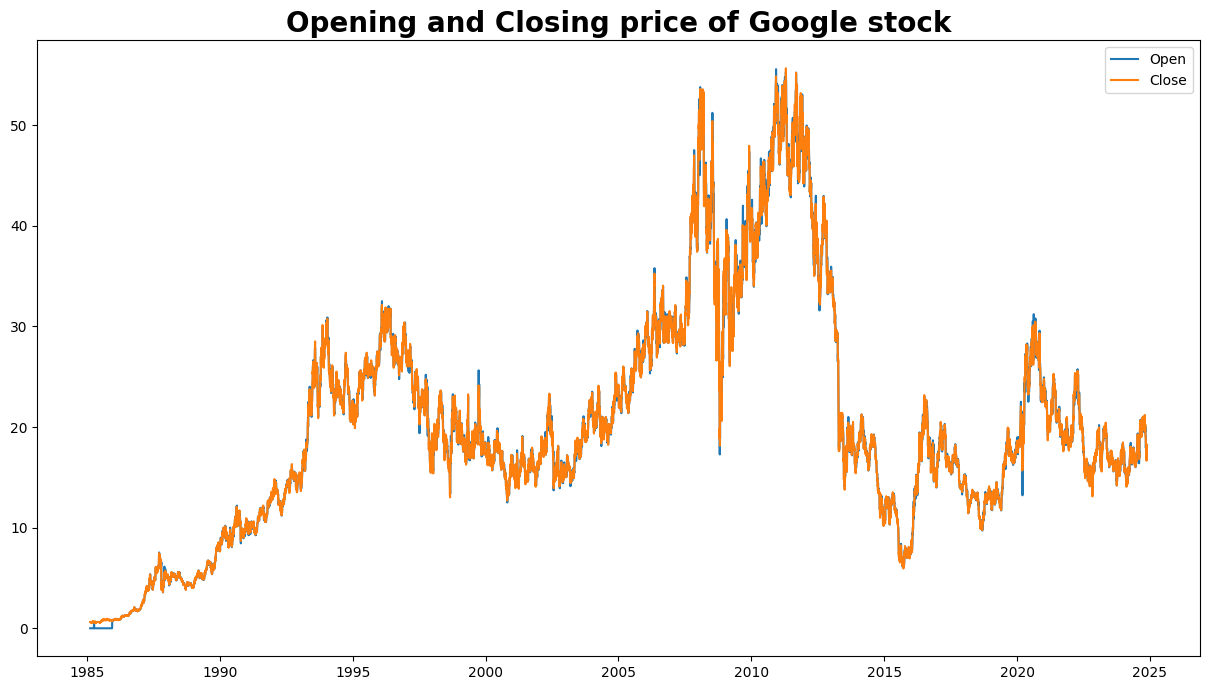

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(google_stock['Open'], label='Open')
plt.plot(google_stock['Close'], label='Close')
plt.legend()
plt.title("Opening and Closing price of Google stock", size=20, weight="bold")

In [69]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [42]:
for i in range(1985,2025):
    print(i,list(google_stock.index.year).count(i))

1985 222
1986 253
1987 253
1988 253
1989 252
1990 253
1991 253
1992 254
1993 253
1994 252
1995 252
1996 254
1997 253
1998 252
1999 252
2000 252
2001 248
2002 252
2003 252
2004 252
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 227


In [43]:
google_stock['MA_for_250_days'] = google_stock['Adj Close'].rolling(250).mean()

In [44]:
google_stock['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
1986-02-04 00:00:00+00:00,NaN
1986-02-05 00:00:00+00:00,NaN
1986-02-06 00:00:00+00:00,NaN
1986-02-07 00:00:00+00:00,NaN
1986-02-10 00:00:00+00:00,0.474498


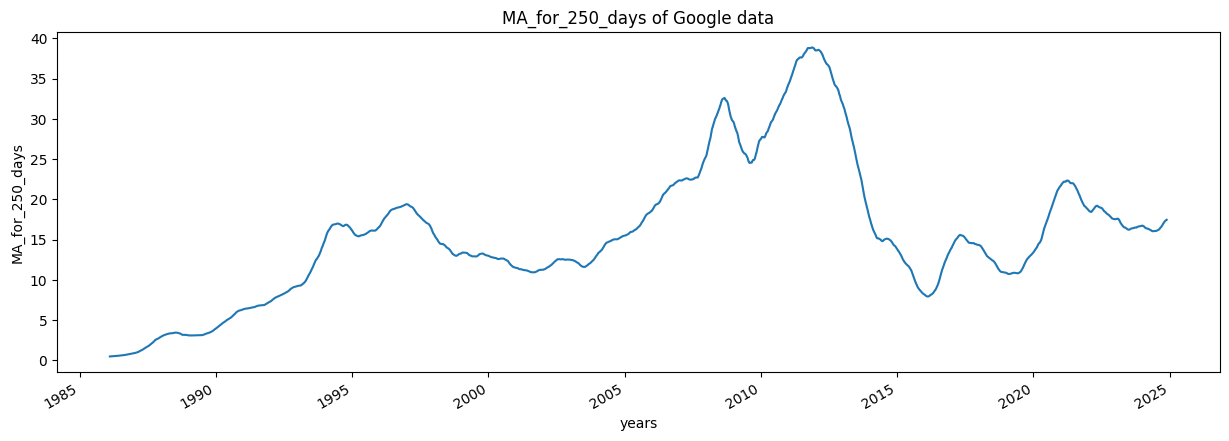

In [45]:
plot_graph((15,5), google_stock['MA_for_250_days'], 'MA_for_250_days')

In [46]:
google_stock['percentage_change_cp'] = google_stock['Adj Close'].pct_change()
google_stock[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOLD,
Date,,
1985-02-13 00:00:00+00:00,0.405,NaN
1985-02-14 00:00:00+00:00,0.405,0.0
1985-02-15 00:00:00+00:00,0.405,0.0
1985-02-19 00:00:00+00:00,0.405,0.0
1985-02-20 00:00:00+00:00,0.405,0.0


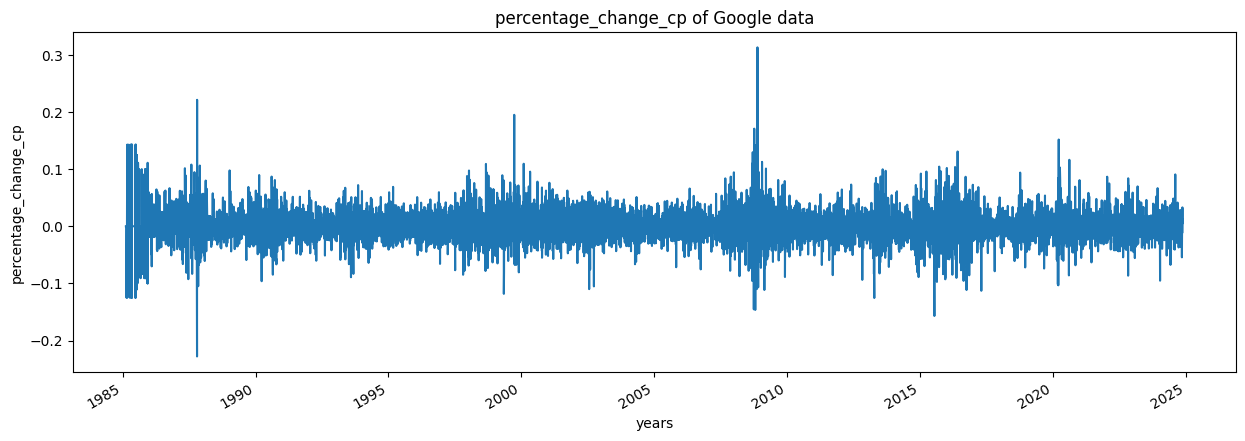

In [47]:
plot_graph((15,5), google_stock['percentage_change_cp'], 'percentage_change_cp')

In [48]:
Adj_close_price = google_stock[['Adj Close']]

In [49]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([43.73081207]), array([0.35437521]))

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00116711],
       [0.00116711],
       [0.00116711],
       ...,
       [0.40426613],
       [0.40956858],
       [0.41187394]])

In [51]:
len(scaled_data)

10025

In [52]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [53]:
x_data[0],y_data[0]

(array([[0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00116711],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00116711],
        [0.00233421],
        [0.00116711],
        [0.00116711],
        [0.00233421],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00116711],
        [0.00116711],
        [0.00116711],
        [0

In [57]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7940, 100, 1)
(7940, 1)
(1985, 100, 1)
(1985, 1)


In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
model.fit(x_train, y_train, batch_size=16, epochs = 5)

Epoch 1/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.0056
Epoch 2/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 9.1022e-04
Epoch 3/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 6.2241e-04
Epoch 4/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 3.9080e-04
Epoch 5/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 3.6088e-04


In [62]:
model.fit(x_train, y_train, batch_size=16, epochs = 10)

Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 2.7400e-04
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 2.1335e-04
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 2.0100e-04
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1.6826e-04
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 2.0763e-04
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1.7159e-04
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 1.8407e-04
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 1.6662e-04
Epoch 9/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 2.0633e-04
Epoch 10/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 1.7369e-04


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 846,683 (3.23 MB)

 Trainable params: 282,227 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564,456 (2.15 MB)

In [63]:
predictions = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [64]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[14.239605],
       [14.958528],
       [14.724778],
       ...,
       [18.112846],
       [18.299921],
       [18.507214]], dtype=float32)

In [65]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[14.80889988],
       [14.43377304],
       [14.46787834],
       ...,
       [17.88999939],
       [18.12000084],
       [18.21999931]])

In [66]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

0.5252615989771646

In [67]:
import pandas as pd

ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_stock.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2017-01-05 00:00:00+00:00,14.808900,14.239605
2017-01-06 00:00:00+00:00,14.433773,14.958528
2017-01-09 00:00:00+00:00,14.467878,14.724778
2017-01-10 00:00:00+00:00,14.322941,14.728098
2017-01-11 00:00:00+00:00,14.220636,14.599764


<Figure size 640x480 with 0 Axes>

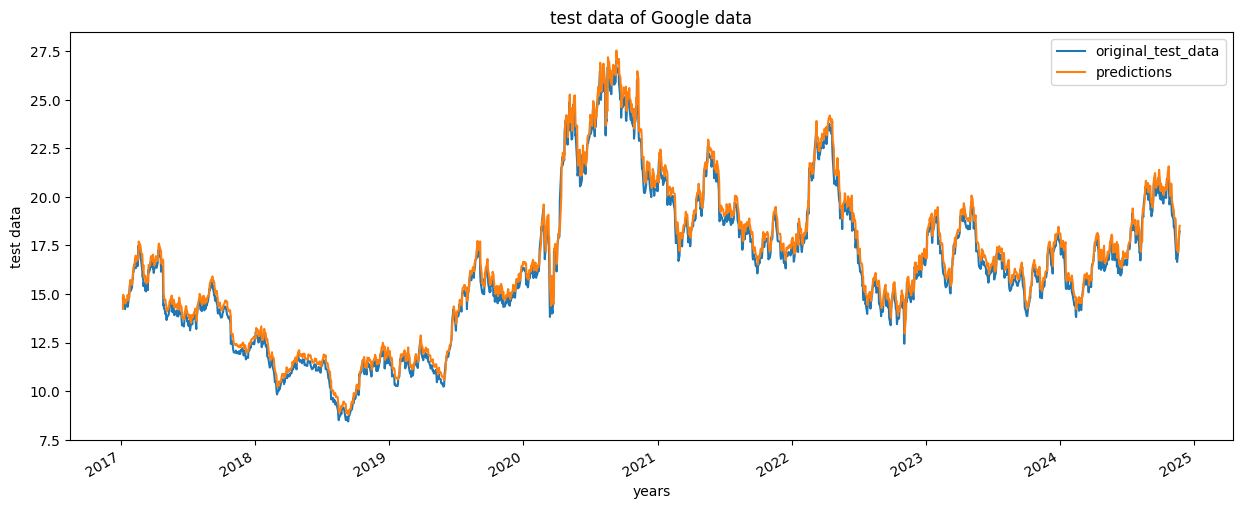

In [70]:
plot_graph((15,6), ploting_data, 'test data')

In [71]:
model.save("/content/drive/MyDrive/FaceMask_detection_models/Latest_stock_price_model.keras")